In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.style as style
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/cityc.csv')
df

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,6,16,4.0,0,8,9.844506,12.668605,7969.000000
1,1,2,12,4.0,1,1,5.000000,15.000000,19614.000000
2,1,2,12,4.0,1,5,14.000000,12.668605,8584.000000
3,1,2,12,4.0,1,8,9.844506,12.668605,9872.000000
4,1,2,12,4.0,1,8,9.844506,12.668605,9743.000000
...,...,...,...,...,...,...,...,...,...
243679,1,3,6,1.0,1,1,2.000000,8.000000,9263.968713
243680,1,2,17,1.0,1,6,8.000000,15.000000,9263.968713
243681,1,2,17,1.0,1,2,15.000000,12.668605,9263.968713
243682,0,2,1,3.0,0,6,8.000000,12.668605,9263.968713


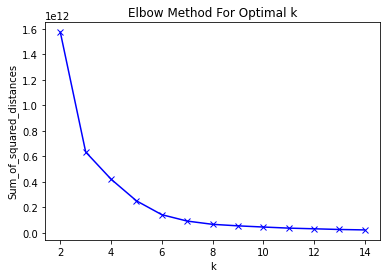

In [ ]:
# cluster analysis
X = df
Sum_of_squared_distances = []
K = range(2,15)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

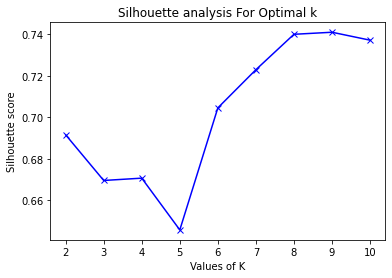

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avg = []
X = df
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters, max_iter=200)
 kmeans.fit(X)
 cluster_labels = kmeans.labels_
 silhouette_avg.append(silhouette_score(X, cluster_labels))
 # silhouette score
    
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

For n_clusters = 4 The average silhouette_score is : 0.6705747192792609


TypeError: ignored

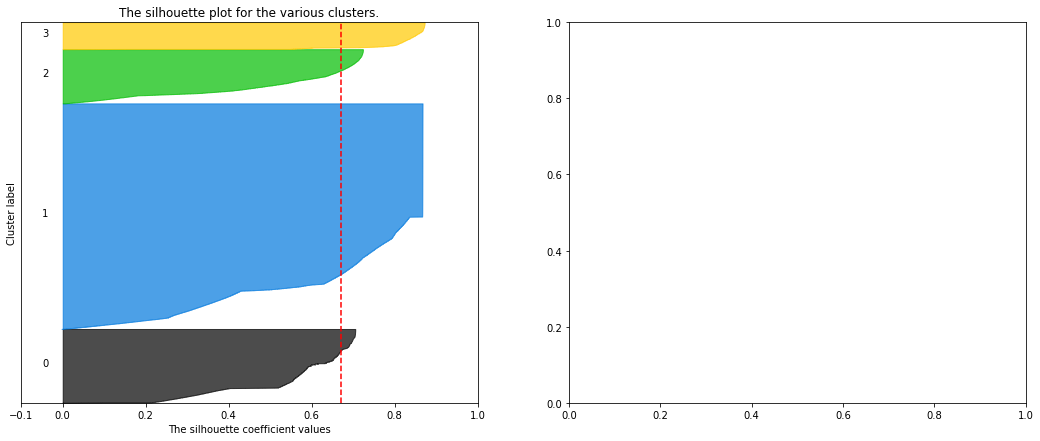

In [ ]:
range_n_clusters = [4,]
X = df

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [ ]:
X = df
km = KMeans(n_clusters=4, max_iter=200, n_init=10, random_state=7)
km = km.fit(X)
def ClusterIndicesNumpy(clustNum, labels_array): #numpy
    return np.where(labels_array == clustNum)[0]
for i in range(0,4):
    a = ClusterIndicesNumpy(i, km.labels_)
    Gender = []
    Age = []
    Occupation = []
    Stay_In_Current_City_Years = []
    Marital_Status = []
    Product_Category_1 = []
    Product_Category_2 = []
    Product_Category_3 = []
    Purchase = []
    for j in a:
        Gender.append(df.Gender[j])
        Age.append(df.Age[j])
        Occupation.append(df.Occupation[j])
        Stay_In_Current_City_Years.append(df.Stay_In_Current_City_Years[j])
        Marital_Status.append(df.Marital_Status[j])
        Product_Category_1.append(df.Product_Category_1[j])
        Product_Category_2.append(df.Product_Category_2[j])
        Product_Category_3.append(df.Product_Category_3[j])
        Purchase.append(df.Purchase[j])
    new_df = pd.DataFrame({'Gender': Gender, 'Age': Age, 'Occupation': Occupation, 'Stay_In_Current_City_Years': Stay_In_Current_City_Years, 'Marital_Status': Marital_Status, 
                           'Product_Category_1': Product_Category_1, 'Product_Category_2': Product_Category_2, 'Product_Category_3': Product_Category_3, 'Purchase': Purchase})
    new_df.to_csv('gdrive/My Drive/Colab Notebooks/cityc_clu/cluster_' + str(i) + '.csv', index=False)
    print(new_df.head())

   Gender  Age  Occupation  Stay_In_Current_City_Years  Marital_Status  \
0       1    6          16                         4.0               0   
1       1    2          12                         4.0               1   
2       1    2          12                         4.0               1   
3       1    2          12                         4.0               1   
4       1    2          17                         0.0               0   

   Product_Category_1  Product_Category_2  Product_Category_3  Purchase  
0                   8            9.844506           12.668605    7969.0  
1                   5           14.000000           12.668605    8584.0  
2                   8            9.844506           12.668605    9872.0  
3                   8            9.844506           12.668605    9743.0  
4                   5           14.000000           12.668605    6973.0  
   Gender  Age  Occupation  Stay_In_Current_City_Years  Marital_Status  \
0       1    2          12           